# Polynomial Regression without Normalization

## Fetch Preprocessed Data

In [ ]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

Cloning into 'amazon_sales_prediction'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 68 (delta 17), reused 49 (delta 7), pack-reused 0
Receiving objects: 100% (68/68), 8.67 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('amazon_sales_prediction/data.csv')
data.head()

,sub_category,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,0,4.1,2092.0,4.590915,7.205687,36.287625,8577.2
1,1,4.4,7943.0,132.534040,240.872394,44.977489,34949.2
2,0,3.8,229.0,2.482227,12.049645,79.400000,870.2
3,0,3.7,33.0,2.156886,18.062417,88.058706,122.1
4,2,3.6,37.0,0.409688,0.590433,30.612245,133.2


## First Model: Polynomial Regression

Our goal is to find the best discount rate, given an existing product with some number of ratings. Our heuristic for the best discount rate is the highest rating. Thus, we will develop our model to predict the ratings given the other columns in the normalized data

In [ ]:
from sklearn.model_selection import train_test_split

y = data['ratings']
X = data.drop('ratings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2500, 6)
(278, 6)
(2500,)
(278,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test_mse_arr = []
train_mse_arr = []
best_model = None
best_mse = float('inf')

for degree in degrees:
  polynomial = PolynomialFeatures(degree=degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly = polynomial.fit_transform(X_test)

  model = LinearRegression()
  model.fit(X_train_poly, y_train)

  Y_pred = model.predict(X_test_poly)
  Y_train_pred = model.predict(X_train_poly)

  test_mse = mean_squared_error(y_test, Y_pred)
  train_mse = mean_squared_error(y_train, Y_train_pred)
  test_mse_arr.append(test_mse)
  train_mse_arr.append(train_mse)
  print(f'Degree = {degree}: Testing MSE = {test_mse}, Training MSE = {train_mse}')

  if test_mse < best_mse:
    best_model = model
    best_mse = min(test_mse, best_mse)

Degree = 1: Testing MSE = 0.32478215864292576, Training MSE = 0.21448088452247335
Degree = 2: Testing MSE = 0.32145592919751426, Training MSE = 0.20413307748093742
Degree = 3: Testing MSE = 0.3166030326117586, Training MSE = 0.19244262359134967
Degree = 4: Testing MSE = 0.9350530842933358, Training MSE = 0.19923483992697247
Degree = 5: Testing MSE = 1.6894098610266222, Training MSE = 0.23095957847888904
Degree = 6: Testing MSE = 10.908249309459775, Training MSE = 0.34016165759857786
Degree = 7: Testing MSE = 0.713349843618229, Training MSE = 0.2332881495318493
Degree = 8: Testing MSE = 3.317185666113495, Training MSE = 0.2326633841713944
Degree = 9: Testing MSE = 0.6134557351263387, Training MSE = 0.2329111263725281
Degree = 10: Testing MSE = 0.7909835810894016, Training MSE = 0.23308581839458106


### Fitting Graphs

Based on the test mean squared loss, we can deduce that the polynomial regression with degree=3 provides us with a reliable model. Models with higher degrees tend to over fit.

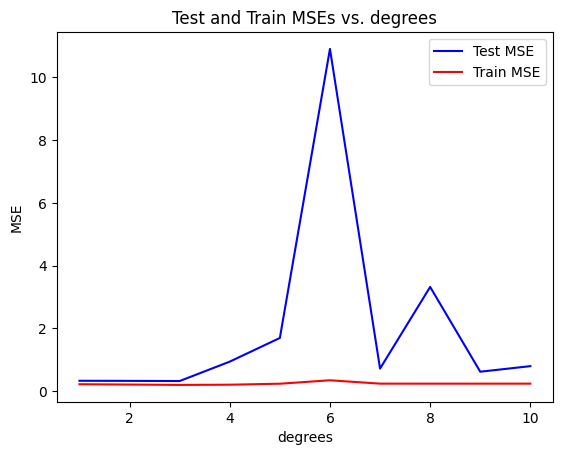

In [ ]:
plt.plot(degrees, test_mse_arr, label='Test MSE', color='blue')
plt.plot(degrees, train_mse_arr, label='Train MSE', color='red')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('Test and Train MSEs vs. degrees')
plt.legend()
plt.show()

On a log scale, we can see that model degree=3 achieves the lowest test mean squared error.

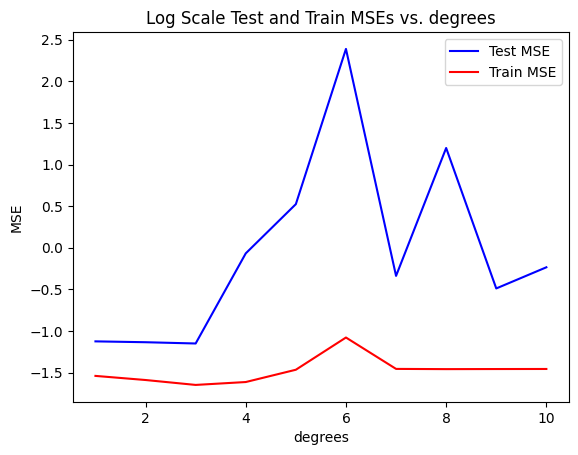

In [ ]:
plt.plot(degrees, np.log(test_mse_arr), label='Test MSE', color='blue')
plt.plot(degrees, np.log(train_mse_arr), label='Train MSE', color='red')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('Log Scale Test and Train MSEs vs. degrees')
plt.legend()
plt.show()

More specifically, let's look at degrees <= 3

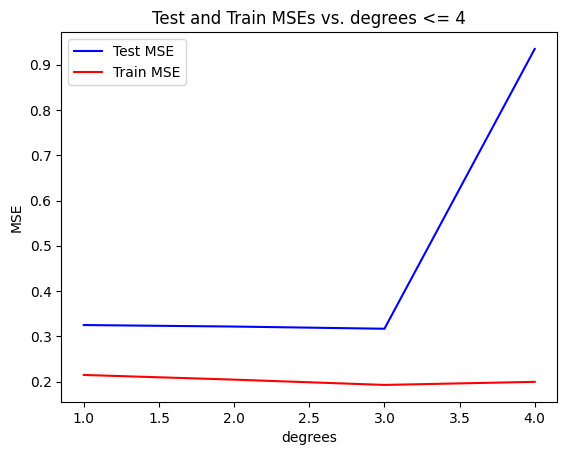

In [ ]:
plt.plot(degrees[:4], test_mse_arr[:4], label='Test MSE', color='blue')
plt.plot(degrees[:4], train_mse_arr[:4], label='Train MSE', color='red')
plt.xlabel('degrees')
plt.ylabel('MSE')
plt.title('Test and Train MSEs vs. degrees <= 4')
plt.legend()
plt.show()

Therefore, when building a polynomial regression model, model of degree 3 achieves the best model.

### Testing out our model with a forward pass

In [ ]:
sample1 = data.iloc[0]

polynomial = PolynomialFeatures(degree=3)
X_train_poly = polynomial.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y1 = sample1['ratings']
x1 = sample1.drop('ratings')
x1 = x1.to_frame().T
x1_poly = polynomial.fit_transform(x1)

yhat1 = model.predict(x1_poly)
print(f'Expected: {y1}, Prediction: {yhat1}')

Expected: 4.1, Prediction: [4.03646184]


In [ ]:
sample2 = data.iloc[1]

y2 = sample2['ratings']
x2 = sample2.drop('ratings')
x2 = x2.to_frame().T
x2_poly = polynomial.fit_transform(x2)

yhat2 = model.predict(x2_poly)
print(f'Expected: {y2}, Prediction: {yhat2}')


Expected: 4.4, Prediction: [4.40735608]


In [ ]:
sample3 = data.iloc[1000]

y3 = sample3['ratings']
x3 = sample3.drop('ratings')
x3 = x3.to_frame().T
x3_poly = polynomial.fit_transform(x3)

yhat3 = model.predict(x3_poly)
print(f'Expected: {y3}, Prediction: {yhat3}')


Expected: 4.5, Prediction: [4.00685458]


In [ ]:
sample4 = data.iloc[2000]

y4 = sample4['ratings']
x4 = sample4.drop('ratings')
x4 = x4.to_frame().T
x4_poly = polynomial.fit_transform(x4)

yhat4 = model.predict(x4_poly)
print(f'Expected: {y4}, Prediction: {yhat4}')

Expected: 4.0, Prediction: [3.99042183]


In [ ]:
sample5 = data.iloc[2200]

y5 = sample5['ratings']
x5 = sample5.drop('ratings')
x5 = x5.to_frame().T
x5_poly = polynomial.fit_transform(x5)

yhat5 = model.predict(x5_poly)
print(f'Expected: {y5}, Prediction: {yhat5}')

Expected: 4.5, Prediction: [4.14260542]


As shown above, although the testing loss is low, some of the forward pass through the degree=3 polynomial regression results in a pretty big difference between expected and predicted ratings values.